In [53]:
import rasterio as rio
from rasterio import plot, mask
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

# Read in images saved by Is-Seattle-Walkable/CreateRasters

In [58]:
cla_raster = rio.open('Rasterized Images/cla_raster.png',crs='EPSG:32610')
parks_raster = rio.open('Rasterized Images/parks_raster.png',crs='EPSG:32610')
ped_raster = rio.open('Rasterized Images/ped_raster.png',crs='EPSG:32610')
retail_raster = rio.open('Rasterized Images/retail_raster.png',crs='EPSG:32610')
transit_raster = rio.open('Rasterized Images/transit_raster.png',crs='EPSG:32610')

In [107]:
#Create arrays from images and crop
cla_raster_arr = cla_raster.read(1, masked=True)[200:1600,500:1400]
parks_raster_arr = parks_raster.read(1, masked=True)[200:1600,500:1400]
ped_raster_arr = ped_raster.read(1, masked=True)[200:1600,500:1400]
retail_raster_arr = retail_raster.read(1, masked=True)[200:1600,500:1400]
transit_raster_arr = transit_raster.read(1, masked=True)[200:1600,500:1400]

In [92]:
hoods = mpimg.imread('Rasterized Images/hood_raster.png')[200:1600,500:1400]

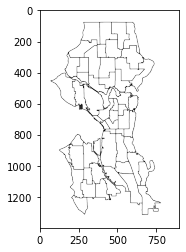

In [93]:
plt.imshow(hoods)

In [94]:
def normalize(r):
    r_normal = (r - np.min(r))/(np.max(r) - np.min(r))*10
    return r_normal

In [95]:
cla_raster_arr_norm = normalize(cla_raster_arr)
parks_raster_arr_norm = normalize(parks_raster_arr)
retail_raster_arr_norm = normalize(retail_raster_arr)
transit_raster_arr_norm = normalize(transit_raster_arr)
ped_raster_arr_norm = normalize(ped_raster_arr)

In [96]:
#Add elements of walkability together
raster_comb = cla_raster_arr_norm + parks_raster_arr_norm + retail_raster_arr_norm + transit_raster_arr_norm + ped_raster_arr_norm

In [98]:
norm_raster = {"Culture, Entertainment, Amentities": cla_raster_arr_norm,
               "Seattle Parks": parks_raster_arr_norm,
               "Seattle Retail": retail_raster_arr_norm,
               "Seattle Transit": transit_raster_arr_norm,
               "Seattle Pedestrian Network": ped_raster_arr_norm
              }

# Normalized Density of Elements that Contribute to Walkability

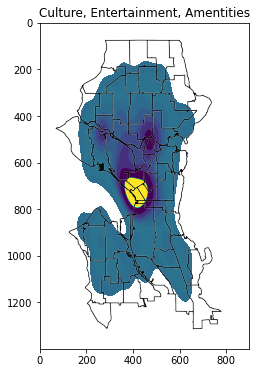

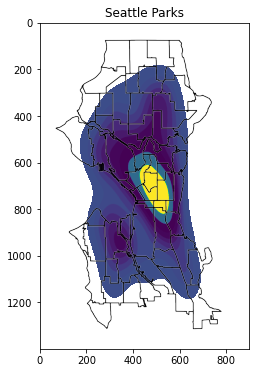

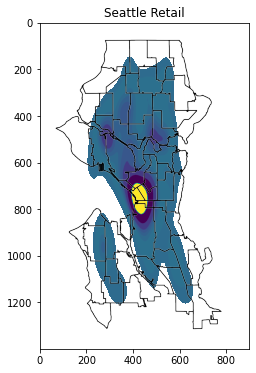

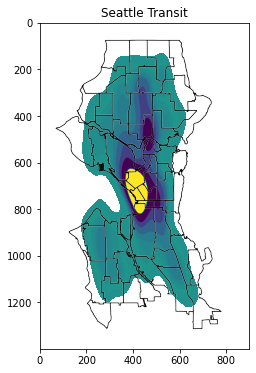

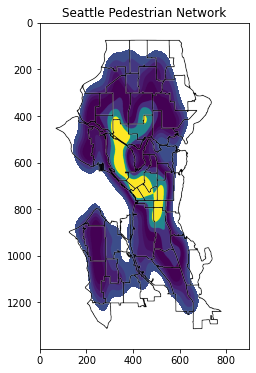

In [101]:
for layer in norm_raster.keys():
    f, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(norm_raster[layer])
    ax.set_title(layer)
    plt.imshow(hoods)

# Combined Walkability

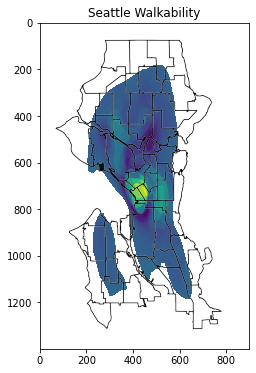

In [109]:
f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(raster_comb_norm)
ax.set_title("Seattle Walkability")
plt.imshow(hoods)
f.savefig("Seattle_Walkability_Final.jpeg")